In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

print(train.head())

  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True  


In [87]:
#looking at training set
print(train.describe())
print(train.isna().sum())

#looking at testing set
print(test.describe())
print(test.isna().sum())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182

In [88]:
train = train.drop(["Name", "PassengerId", "Destination"], axis=1)
test = test.drop(["Name", "PassengerId", "Destination"], axis=1)

#looking at training set
print(train.describe())
print(train.isna().sum())

#looking at testing set
print(test.describe())
print(test.isna().sum())

               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  
HomePlanet      201
CryoSleep       217
Cabin           199
Age             179
VIP             203

In [89]:
#train = train.dropna()

#looking at training set
print(train.describe())
print(train.isna().sum())
print(train['CryoSleep'])


               Age   RoomService     FoodCourt  ShoppingMall           Spa  \
count  8514.000000   8512.000000   8510.000000   8485.000000   8510.000000   
mean     28.827930    224.687617    458.077203    173.729169    311.138778   
std      14.489021    666.717663   1611.489240    604.696458   1136.705535   
min       0.000000      0.000000      0.000000      0.000000      0.000000   
25%      19.000000      0.000000      0.000000      0.000000      0.000000   
50%      27.000000      0.000000      0.000000      0.000000      0.000000   
75%      38.000000     47.000000     76.000000     27.000000     59.000000   
max      79.000000  14327.000000  29813.000000  23492.000000  22408.000000   

             VRDeck  
count   8505.000000  
mean     304.854791  
std     1145.717189  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%       46.000000  
max    24133.000000  
HomePlanet      201
CryoSleep       217
Cabin           199
Age             179
VIP             203

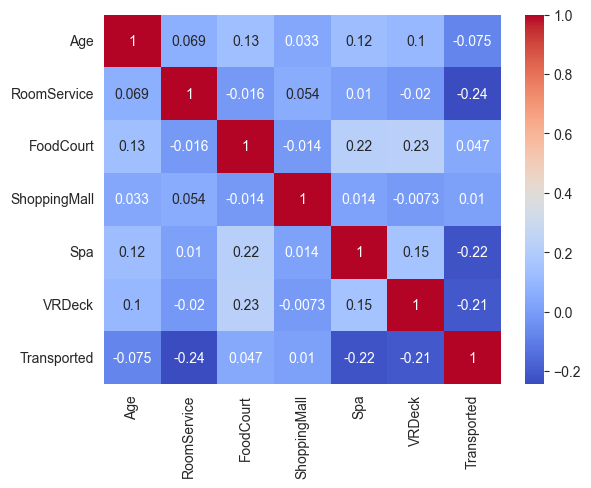

In [90]:
#Sns heat map using numbers and bool
numeric_columns = train.select_dtypes(include=['int64', 'float64', "bool"])
correlation_matrix = numeric_columns.corr()

# Plot heatmap
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.show()

In [91]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix

In [92]:
actual = pd.read_csv("Data/sample_submission.csv")
actual = actual.drop("PassengerId", axis=1)



#Filling NA Values in Cabin for data reading
train["Cabin"] = train["Cabin"].fillna(str("T"))
test["Cabin"] = test["Cabin"].fillna(str('T'))

#Filling NA Values in Cabin for data reading
train["Age"] = train["Age"].fillna(train["Age"].mean())
test["Age"] = test["Age"].fillna(train["Age"].mean())

#Filling NA Values in Cabin for data reading
train["HomePlanet"] = train["HomePlanet"].fillna("NA")
test["HomePlanet"] = test["HomePlanet"].fillna("NA")

#Filling NA Values in Cabin for data reading
train["CryoSleep"] = train["CryoSleep"].fillna(False)
test["CryoSleep"] = test["CryoSleep"].fillna(False)

trial = 1

#Crap not needed
if trial == 1:

    #Filling NA Values in Cabin for data reading
    train["VIP"] = train["VIP"].fillna(False)
    test["VIP"] = test["VIP"].fillna(False)

    #Filling NA Values in Cabin for data reading
    train["RoomService"] = train["RoomService"].fillna(0)
    test["RoomService"] = test["RoomService"].fillna(0)

    #Filling NA Values in Cabin for data reading
    train["FoodCourt"] = train["FoodCourt"].fillna(0)
    test["FoodCourt"] = test["FoodCourt"].fillna(0)

    #Filling NA Values in Cabin for data reading
    train["ShoppingMall"] = train["ShoppingMall"].fillna(0)
    test["ShoppingMall"] = test["ShoppingMall"].fillna(0)

    #Filling NA Values in Cabin for data reading
    train["Spa"] = train["Spa"].fillna(0)
    test["Spa"] = test["Spa"].fillna(0)

    #Filling NA Values in Cabin for data reading
    train["VRDeck"] = train["VRDeck"].fillna(0)
    test["VRDeck"] = test["VRDeck"].fillna(0)

else: 
    train = train.drop(["VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"], axis=1)
    test = test.drop(["VIP", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"], axis=1)

    


#Takes the first letter of Cabin and splits it up to make data readable.
train['Cabin'] = train['Cabin'].map(lambda x: x[0])
test['Cabin'] = test['Cabin'].map(lambda x: x[0])


#Error keeps popping up that could not convert string to float: 'Europa' Map changes them to numbers
train['HomePlanet'] = train["HomePlanet"].map({'Earth' : 1, 'Mars' : 2, 'Europa' : 3, "NA": 4})
train['Cabin'] = train["Cabin"].map({'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E': 5, 'F' : 6, 'G' : 7, "T" : 8})

test['HomePlanet'] = test["HomePlanet"].map({'Earth' : 1, 'Mars' : 2, 'Europa' : 3, "NA" : 4})
test['Cabin'] = test["Cabin"].map({'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E': 5, 'F' : 6, 'G' : 7, "T" : 8})



X_train = train.drop("Transported", axis=1)
X_test = test
y_train = train['Transported']
y_test = actual 


C:\Users\scout\AppData\Local\Temp\ipykernel_18464\761214582.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train["CryoSleep"] = train["CryoSleep"].fillna(False)
C:\Users\scout\AppData\Local\Temp\ipykernel_18464\761214582.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test["CryoSleep"] = test["CryoSleep"].fillna(False)
C:\Users\scout\AppData\Local\Temp\ipykernel_18464\761214582.py:28: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False

In [93]:
X = pd.concat([X_train, X_test], axis=0)
y = np.concatenate([y_train.values, y_test["Transported"].values])


from sklearn.model_selection import cross_val_score

In [94]:

dt_model = DecisionTreeClassifier(random_state=1103)
# Define hyperparameter space for random search

param_grid = {

    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']

}

# Perform random search for hyperparameter optimization

random_search = RandomizedSearchCV(dt_model, param_grid, cv=5, scoring='accuracy', n_iter=10, random_state=1103)

random_search.fit(X_train, y_train)


# Get the best hyperparameters and the corresponding model

best_params = random_search.best_params_

best_model_dt = random_search.best_estimator_

print(best_params)

# Make predictions with the optimized model

y_pred_optimized = best_model_dt.predict(X_test)


# Evaluate the model after optimization

accuracy_after_optimization_dt = accuracy_score(y_test, y_pred_optimized)


print(f"Accuracy after optimization for Decision Tree: {accuracy_after_optimization_dt}")

{'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 9, 'criterion': 'entropy'}
Accuracy after optimization for Decision Tree: 0.4535889642272621


In [95]:
#Used to pull passager IDs"
test = pd.read_csv("Data/test.csv")

In [96]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Transported": y_pred_optimized})

print(submission)

submission.to_csv('Data/submission.csv', index=False)

     PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01         True
...          ...          ...
4272     9266_02         True
4273     9269_01        False
4274     9271_01         True
4275     9273_01        False
4276     9277_01        False

[4277 rows x 2 columns]
